In [15]:
import pandas as pd

X_train = pd.read_feather('X_train_selected')
y_train = pd.read_feather('with_dates_y_train')
y_train = y_train.drop(columns = 'index')
df_train = X_train.merge(y_train, left_index = True, right_index = True)

X_val = pd.read_feather('X_val_selected')
y_val = pd.read_feather('with_dates_y_validate')
y_val = y_val.drop(columns = 'index')
df_val = X_val.merge(y_val, left_index = True, right_index = True)



In [13]:
from sklearn.ensemble import RandomForestRegressor


In [19]:
rfr = RandomForestRegressor(n_estimators=21, max_features='auto', min_samples_leaf = 5, random_state = 35)
rfr.fit(X_train, y_train)
rfr.score(X_val, y_val)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.6505868159178618

In [21]:
import eli5
from eli5.sklearn import PermutationImportance
pmi_limited = PermutationImportance(rfr).fit(X_val, y_val)

In [22]:
eli5.explain_weights_df(pmi_limited, feature_names = X_val.columns.to_list())

,feature,weight,std
0,Fascinating_ratings,0.201992,0.015340
1,OK_ratings,0.161923,0.005855
2,Informative_ratings,0.096709,0.005355
3,Inspiring_ratings,0.075558,0.001028
4,languages,0.037376,0.003702
5,Funny_ratings,0.032707,0.010063


In [28]:
from plotnine import *
sampled_train = df_train.sample(n=1000, random_state=35)

In [43]:
from pdpbox.pdp import pdp_plot, pdp_isolate
import pdpbox
def plot_pdp(model, X, feature_names, feature, clusters = None):
    iso = pdp_isolate(model, X, feature_names, feature)
    return pdp_plot(iso, feature, plot_lines = True, cluster=clusters, n_cluster_centers=clusters)

## Fascinating_ratings

/anaconda3/lib/python3.7/site-packages/plotnine/stats/smoothers.py:238: UserWarning: See sklearn.gaussian_process.GaussianProcessRegressor for parameters to pass in as 'method_args'
  "See sklearn.gaussian_process.GaussianProcessRegressor "
/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:357: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


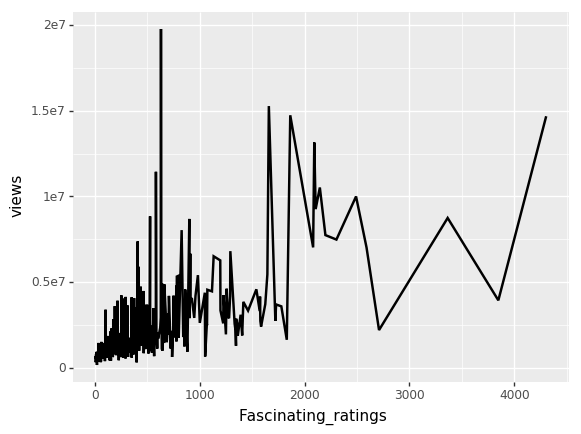

<ggplot: (282230364)>

In [41]:
(ggplot(sampled_train, aes('Fascinating_ratings', 'views'))
 + stat_smooth(se=True, method='gpr'))

This chart shows that the number of views consistently increase for Fascinating_ratings between ~3700 and 4200. <br>
Additionally the number of views decrease between 2500 and 2750 Fascinating_ratings.

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c24465898>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c2449ffd0>})

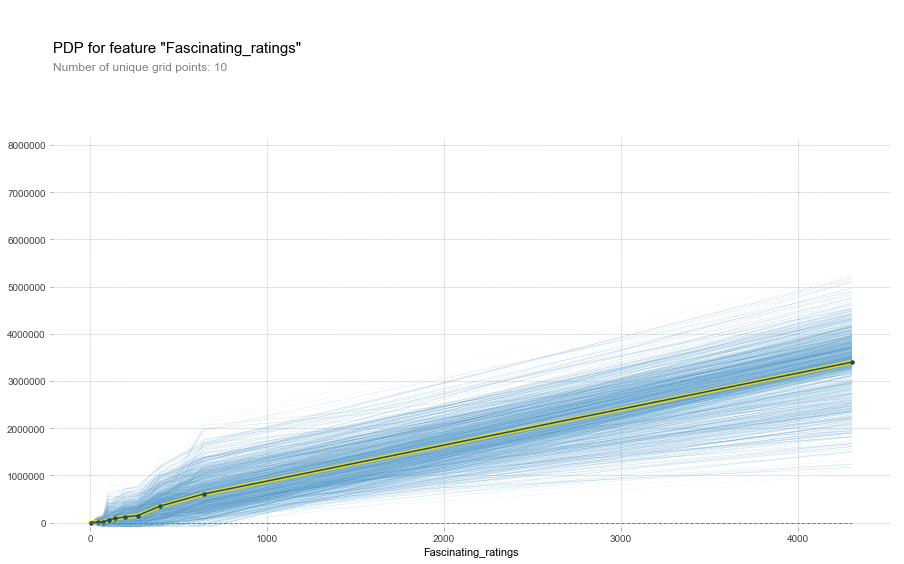

In [47]:
plot_pdp(rfr, X_train.sample(1000), X_train.columns, 'Fascinating_ratings', None)

We see that on average the number of views for a Ted talk increases by ~667 for every Fascinating_rating. <br>

## OK_ratings

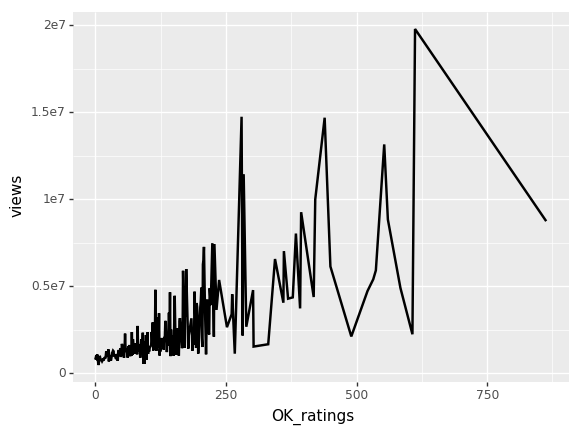

<ggplot: (-9223372029299319857)>

In [48]:
(ggplot(sampled_train, aes('OK_ratings', 'views'))
 + stat_smooth(se=True, method='gpr'))

This chart shows that the number of views consistently decreases between 400 and 500 OK_ratings, and consistenly increases between 500 and ~575 OK_ratings.

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c25d85e80>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c25da3ba8>})

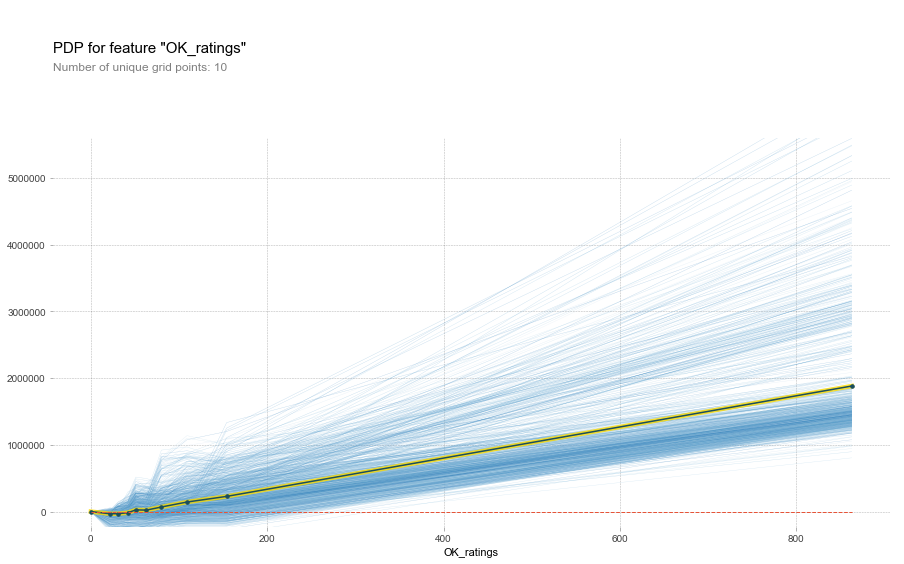

In [49]:
plot_pdp(rfr, X_train.sample(1000), X_train.columns, 'OK_ratings', None)

The PDP plot shows that on average the number of views increases by ~2200 for each additional OK_rating.

## Informative_Ratings

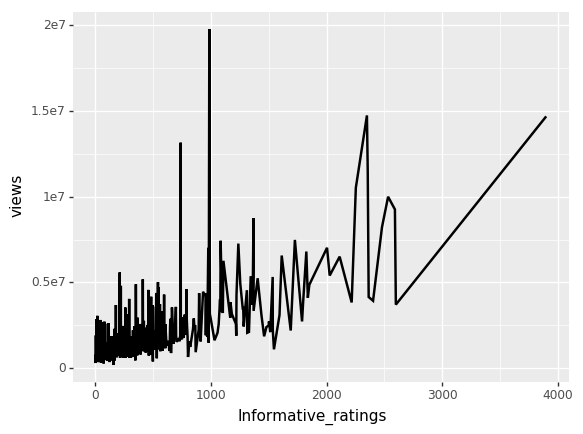

<ggplot: (-9223372029296606411)>

In [51]:
(ggplot(sampled_train, aes('Informative_ratings', 'views'))
 + stat_smooth(se=True, method='gpr'))

The plot shows that the number of views is consistently increasing between ~2600 and 3900 Informative_ratings.

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c26cb6f98>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c26c1a160>})

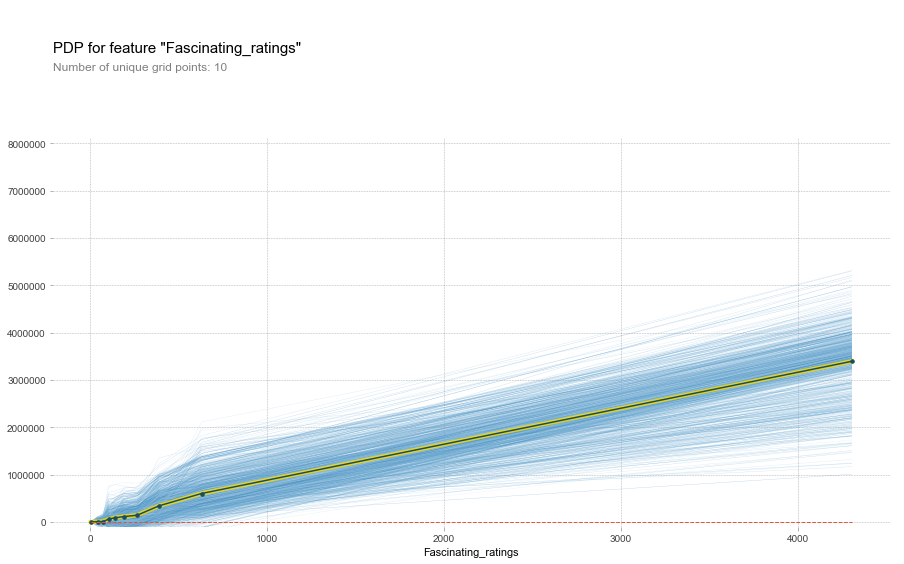

In [50]:
plot_pdp(rfr, X_train.sample(1000), X_train.columns, 'Fascinating_ratings', None)

The PDP shows that the number of views increases on average by ~763 for each additional Fascinating_rating. <br>

## Inspiring_ratings

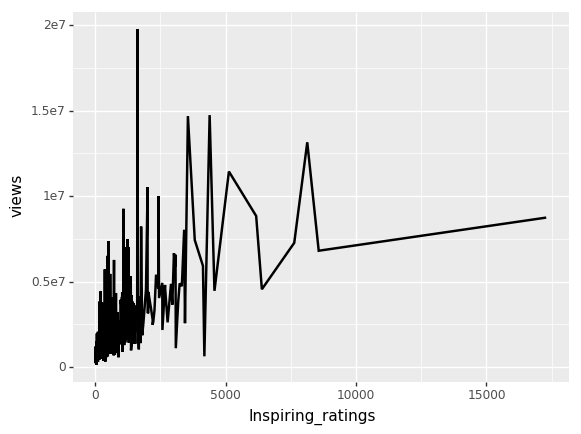

<ggplot: (-9223372029296507837)>

In [52]:
(ggplot(sampled_train, aes('Inspiring_ratings', 'views'))
 + stat_smooth(se=True, method='gpr'))

The plot shows that the number of views is slowly increasing between 8000 and 17000 Inspiring_ratings.

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c2808de10>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c2817bf28>})

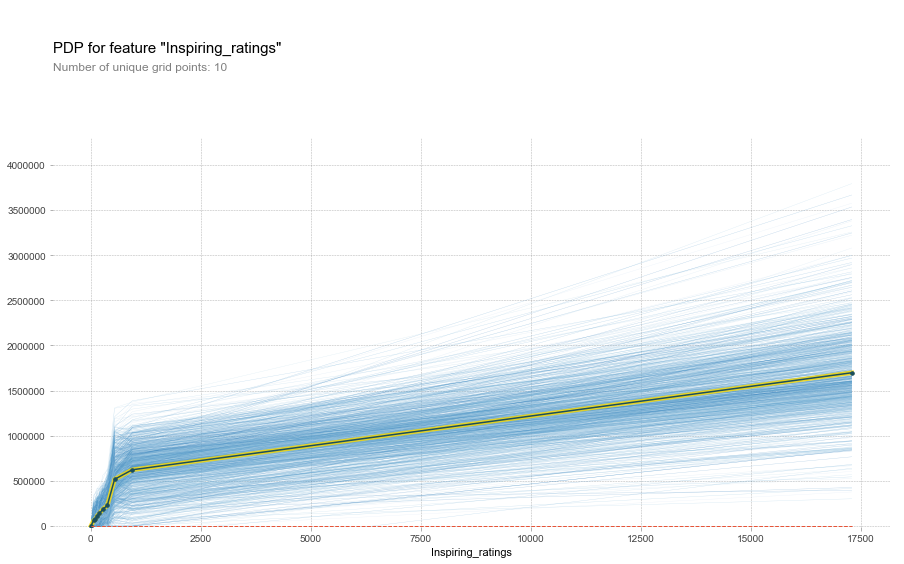

In [53]:
plot_pdp(rfr, X_train.sample(1000), X_train.columns, 'Inspiring_ratings', None)

The PDP shows that the number of views for a Ted Talk increases on average by 100 for every additional Inspiring_rating.

## Languages

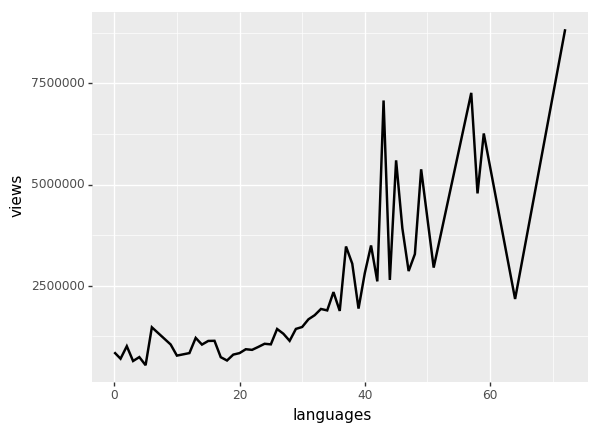

<ggplot: (-9223372029296491355)>

In [54]:
(ggplot(sampled_train, aes('languages', 'views'))
 + stat_smooth(se=True, method='gpr'))

The plot shows that the number of views consistently increases between 51 and 57 languages and between 62 and 71 languages.

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c291bfc18>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c29238198>})

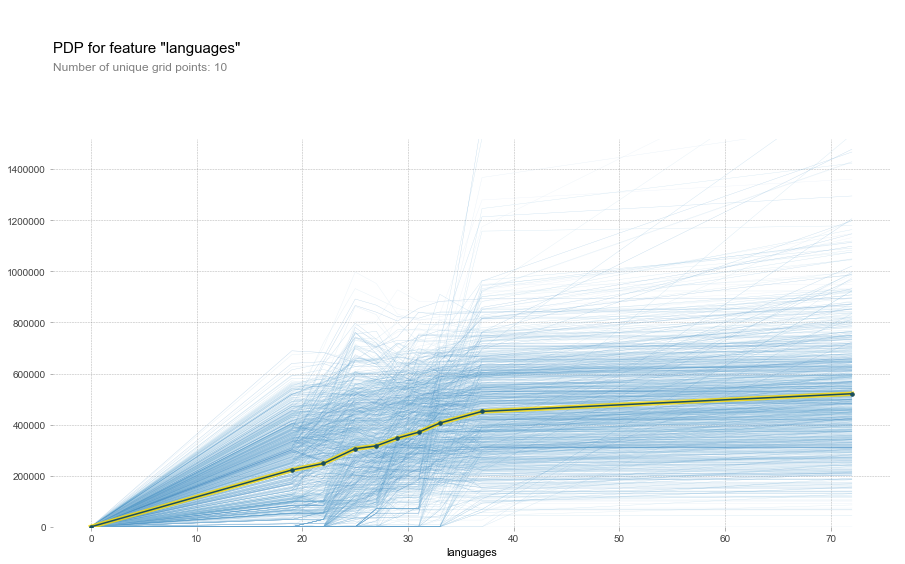

In [55]:
plot_pdp(rfr, X_train.sample(1000), X_train.columns, 'languages', None)

The PDP shows that the number of views added when you have between 40 and 71 languages is pretty consistent but gradually increases. <br>
This increase is at a much lower rate than between 0-40 languages.<br>
The average number of views increases by about 10,000 for each additional language the Ted Talk is available in. <br>

## Funny_ratings

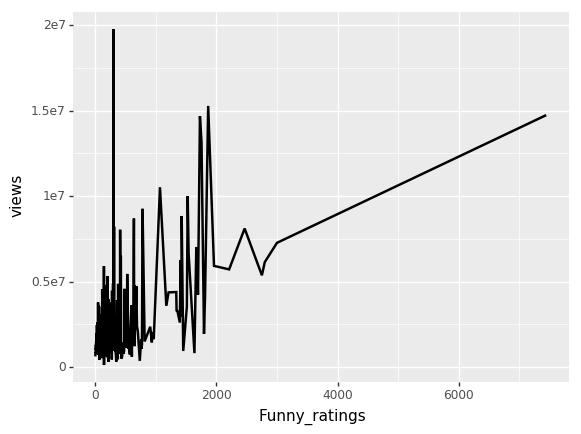

<ggplot: (7558962240)>

In [56]:
(ggplot(sampled_train, aes('Funny_ratings', 'views'))
 + stat_smooth(se=True, method='gpr'))

The plot shows that the number of views consistently increases between 2750 Funny_ratings and 7200 Funny_ratings

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c2a40a780>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c2b063048>})

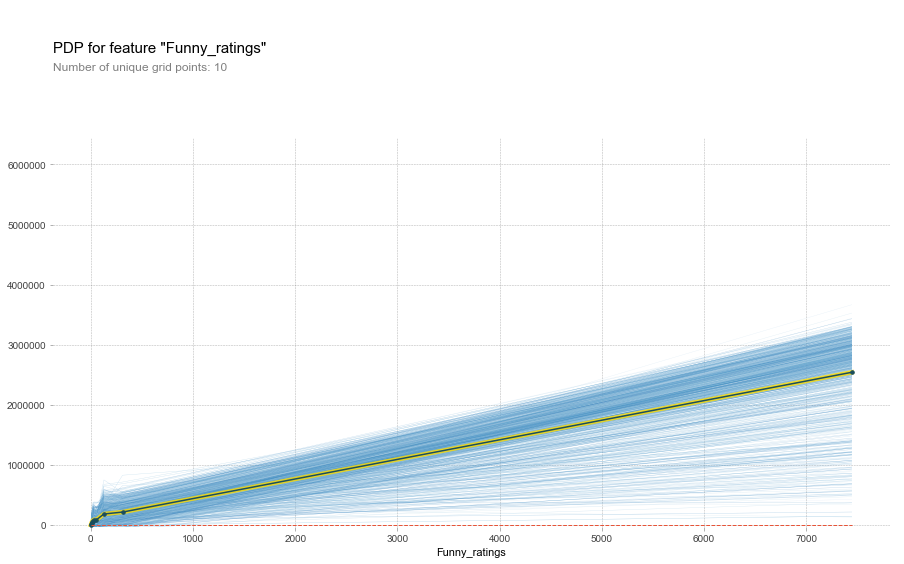

In [57]:
plot_pdp(rfr, X_train.sample(1000), X_train.columns, 'Funny_ratings', None)

The PDP shows that the number of views on a Ted Talk increases by ~333 for each additional Funny_rating.